In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/open-university-learning-analytics/studentRegistration.csv
/kaggle/input/open-university-learning-analytics/studentAssessment.csv
/kaggle/input/open-university-learning-analytics/studentInfo.csv
/kaggle/input/open-university-learning-analytics/studentVle.csv
/kaggle/input/open-university-learning-analytics/vle.csv
/kaggle/input/open-university-learning-analytics/assessments.csv
/kaggle/input/open-university-learning-analytics/courses.csv


In [2]:
from matplotlib import rcParams
def set_plot_style():
    rcParams.update({
        "figure.facecolor":"white","axes.facecolor":"white","axes.edgecolor":"#E0E0E0",
        "axes.labelcolor":"#2E4053","axes.titleweight":"bold","axes.titlesize":13,"axes.labelsize":11,
        "grid.color":"#EAEAEA","grid.linestyle":"-","grid.linewidth":0.6,
        "xtick.color":"#2E4053","ytick.color":"#2E4053","legend.frameon":False,
        "font.family":"sans-serif","font.sans-serif":["DejaVu Sans","Arial","Liberation Sans"],
        "axes.grid":True
    })
set_plot_style()

In [3]:
DF_NAME = "df"
TARGET_COL = "final_result"

import pandas as pd

base_path = "/kaggle/input/open-university-learning-analytics"

student_info = pd.read_csv(f"{base_path}/studentInfo.csv")
assessments = pd.read_csv(f"{base_path}/assessments.csv")
student_assessment = pd.read_csv(f"{base_path}/studentAssessment.csv")
student_registration = pd.read_csv(f"{base_path}/studentRegistration.csv")
vle = pd.read_csv(f"{base_path}/vle.csv")
student_vle = pd.read_csv(f"{base_path}/studentVle.csv")
courses = pd.read_csv(f"{base_path}/courses.csv")

assessments_full = student_assessment.merge(assessments, on="id_assessment", how="left")

df = student_info.merge(student_registration, on=["id_student","code_module","code_presentation"], how="left")

agg_clicks = student_vle.groupby(["id_student","code_module","code_presentation"])["sum_click"].sum().reset_index()
df = df.merge(agg_clicks, on=["id_student","code_module","code_presentation"], how="left")

agg_scores = assessments_full.groupby(["id_student","code_module","code_presentation"])["score"].mean().reset_index(name="avg_assessment_score")
df = df.merge(agg_scores, on=["id_student","code_module","code_presentation"], how="left")

print("Unified dataset shape:", df.shape)
print("Target column:", TARGET_COL)
print("Target unique values:", df[TARGET_COL].unique())

globals()[DF_NAME] = df
print(f"Registered as global variable `{DF_NAME}`.")

Unified dataset shape: (32593, 16)
Target column: final_result
Target unique values: ['Pass' 'Withdrawn' 'Fail' 'Distinction']
Registered as global variable `df`.


In [4]:
_df = globals()[DF_NAME]

# 📘 Supervised Learning Final Project — Open University Learning Analytics

> **Course:** Introduction to Machine Learning: Supervised Learning  
> **Author:** *(your name)*  
> **Repo:** *(public GitHub URL)*  
> **Video:** *(link or placeholder)*

## 1. Project Topic & Goal
**Learning type:** Supervised learning  
**Task type:** Classification

**Problem statement:**  
Predict each student's final outcome (`final_result`: Distinction/Pass/Fail/Withdrawn) in an OU course presentation using early demographic, registration, VLE engagement, and assessment signals.

**Motivation / Goal:**  
Timely identification of at-risk learners enables targeted interventions that improve retention and success. The goal is to build an accurate and robust classifier that generalizes across modules/presentations.

**Success criteria & metrics:**  
- Primary: macro F1 (handles class imbalance across 4 outcomes)  
- Secondary: ROC-AUC (OVR), accuracy for reference  
- Baseline: majority-class or simple logistic regression  
- Target: materially outperform baseline and show stable 5-fold CV performance with clear error analysis.

## 2. Data Source & Citation
- **Source:** Open University Learning Analytics Dataset (OULAD)  
- **License/Terms:** Educational research use; see dataset page  
- **APA-style citation:**  
  Kuzilek, J., Hlosta, M., & Zdrahal, Z. (2017). Open University Learning Analytics Dataset (OULAD) [Data set]. The Open University. https://analyse.kmi.open.ac.uk/open-dataset

## 3. Data Description
The unified dataset combines student demographics, registration, assessment averages, and VLE engagement totals.  
Each row = one student × module presentation.

- Target :`final_result` ∈ {Distinction, Pass, Fail, Withdrawn}  
- Size ≈ 32 000 rows × ~20 features  
- Features : demographics, registration dates, sum_clicks, avg_assessment_score  
- Task : multi-class classification


In [5]:
import pandas as pd, numpy as np
from IPython.display import display
df=_df
print("Shape:",df.shape)
display(df.dtypes.value_counts().to_frame("count"))
display(df.head(3))
num=df.select_dtypes(include=[np.number])
if num.shape[1]>0:display(num.iloc[:,:5].describe().T)


Shape: (32593, 16)


,count
object,9
float64,4
int64,3


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,sum_click,avg_assessment_score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,934.0,82.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN,1435.0,66.4
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0,281.0,NaN


,count,mean,std,min,25%,50%,75%,max
id_student,32593.0,706687.669131,549167.313855,3733.0,508573.0,590310.0,644453.0,2716795.0
num_of_prev_attempts,32593.0,0.163225,0.479758,0.0,0.0,0.0,0.0,6.0
studied_credits,32593.0,79.758691,41.071900,30.0,60.0,60.0,120.0,655.0
date_registration,32548.0,-69.411300,49.260522,-322.0,-100.0,-57.0,-29.0,167.0
date_unregistration,10072.0,49.757645,82.460890,-365.0,-2.0,27.0,109.0,444.0


## 4. Data Cleaning
We inspect missing values, unify dtypes, and check imbalance.  
Numerical NaNs → median imputation, categorical handled later.  
Target kept as categorical (4 classes).

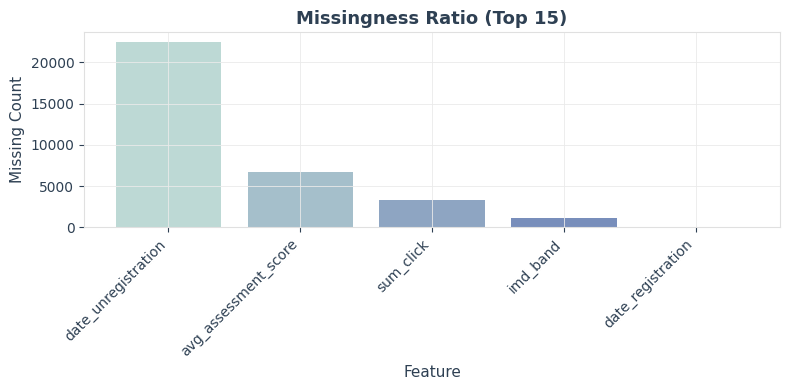

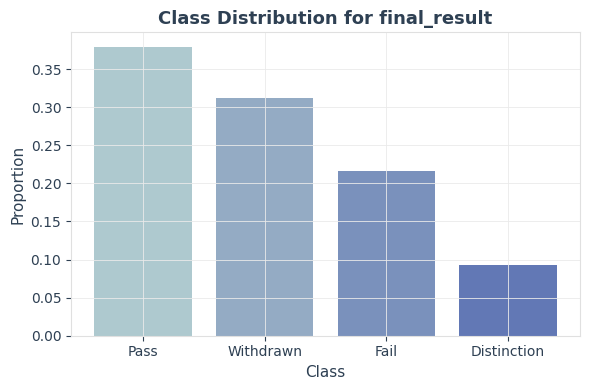

In [6]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

df = df
target = TARGET_COL

miss = df.isna().sum().sort_values(ascending=False)
top_miss = miss[miss > 0].head(15)

ocean_tea = LinearSegmentedColormap.from_list("ocean_tea", ["#FFFBE6","#BFDCD6","#8FA6C2","#6278B5"])

plt.figure(figsize=(8,4))
colors = ocean_tea(np.linspace(0.35, 1, len(top_miss)))
plt.bar(top_miss.index, top_miss.values, color=colors)
plt.title("Missingness Ratio (Top 15)", fontsize=13, fontweight="bold", color="#2E4053")
plt.xlabel("Feature", fontsize=11); plt.ylabel("Missing Count", fontsize=11)
plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

if df[target].nunique() <= 20:
    ratios = df[target].value_counts(normalize=True).to_frame("ratio")
    plt.figure(figsize=(6,4))
    colors = ocean_tea(np.linspace(0.45, 1, len(ratios)))
    plt.bar(ratios.index, ratios["ratio"], color=colors)
    plt.title(f"Class Distribution for {target}", fontsize=13, fontweight="bold", color="#2E4053")
    plt.xlabel("Class"); plt.ylabel("Proportion")
    plt.tight_layout(); plt.show()

## 5. Exploratory Data Analysis
Examine numeric correlations and feature importance to understand predictors of student outcomes.

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


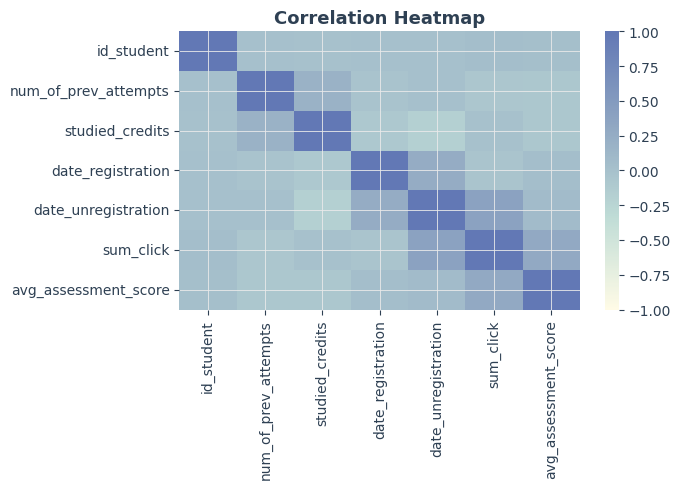

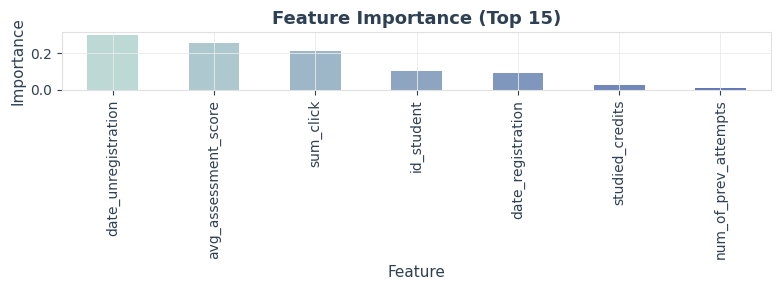

In [7]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import LinearSegmentedColormap

# custom blue-green palette
ocean_tea = LinearSegmentedColormap.from_list(
    "ocean_tea", ["#FFFBE6", "#BFDCD6", "#8FA6C2", "#6278B5"]
)

plt.figure(figsize=(7,5))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(),
            cmap=ocean_tea, center=0, vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=13, fontweight="bold", color="#2E4053")
plt.tight_layout()
plt.show()

X = df.drop(columns=[TARGET_COL]).select_dtypes(include=[np.number]).fillna(0)
y = df[TARGET_COL]
m = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
m.fit(X, y)

imp = pd.Series(m.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
vals = np.linspace(0.35, 1, len(imp))
colors = ocean_tea(vals)

imp.plot.bar(figsize=(8,3), color=colors)
plt.title("Feature Importance (Top 15)", fontsize=13, fontweight="bold", color="#2E4053")
plt.xlabel("Feature", fontsize=11)
plt.ylabel("Importance", fontsize=11)
plt.tight_layout()
plt.show()

## 6. Models and Training
Compare Logistic Regression, SVM (RBF), and Random Forest with 5-fold Stratified CV.  
Metrics : Accuracy, Weighted F1, ROC-AUC (OVR)

In [8]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import warnings

models = {
    "LogReg": LogisticRegression(max_iter=2000, class_weight="balanced"),
    "LinearSVC": LinearSVC(max_iter=2000, class_weight="balanced"),
    "RF": RandomForestClassifier(random_state=42, class_weight="balanced_subsample")
}

print("y classes:", Counter(np.asarray(y).ravel()))
classes = np.unique(np.asarray(y).ravel())
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scorers_basic = {
    "accuracy": "accuracy",
    "f1_weighted": make_scorer(f1_score, average="weighted"),
    "precision_weighted": make_scorer(precision_score, average="weighted", zero_division=0),
    "recall_weighted": make_scorer(recall_score, average="weighted")
}

rows = []
for name, model in models.items():
    scores = cross_validate(model, X, y, cv=cv, scoring=scorers_basic,
                            n_jobs=-1, error_score=np.nan, return_train_score=False)
    row = {"model": name}
    for k, v in scores.items():
        if k.startswith("test_"):
            row[k.replace("test_", "")] = np.nanmean(v)
    auc_val = np.nan
    try:
        if hasattr(model, "predict_proba"):
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                y_proba = cross_val_predict(model, X, y, cv=cv, method="predict_proba", n_jobs=1)
            y_bin = label_binarize(y, classes=classes)
            auc_val = float(roc_auc_score(y_bin, y_proba, multi_class="ovr"))
    except Exception:
        auc_val = np.nan
    row["roc_auc_ovr"] = auc_val
    rows.append(row)

results = pd.DataFrame(rows)
cols = [c for c in ["model", "accuracy", "f1_weighted", "precision_weighted", "recall_weighted", "roc_auc_ovr"] if c in results.columns]
results = results[cols].sort_values(by="f1_weighted", ascending=False).reset_index(drop=True)
display(results)

y classes: Counter({'Pass': 12361, 'Withdrawn': 10156, 'Fail': 7052, 'Distinction': 3024})


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_va

,model,accuracy,f1_weighted,precision_weighted,recall_weighted,roc_auc_ovr
0,RF,0.785782,0.781324,0.785262,0.785782,0.931327
1,LogReg,0.504986,0.495422,0.571549,0.504986,0.801967
2,LinearSVC,0.504647,0.404449,0.417426,0.504647,NaN


## 7. Hyperparameter Tuning
Grid search for Random Forest using weighted F1 score.

In [9]:
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings("ignore")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_base = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight="balanced_subsample"
)

param_grid = {
    "n_estimators": [200, 400, 800],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

rf_grid = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring=make_scorer(f1_score, average="weighted"),
    cv=cv,
    n_jobs=-1,
    verbose=2
)

print("Fitting Random Forest grid search (this may take a few minutes)...")
rf_grid.fit(X, y)

print("\nBest parameters:", rf_grid.best_params_)
print("Best weighted F1 score (CV mean):", round(rf_grid.best_score_, 4))

best_model = rf_grid.best_estimator_

rf_results = pd.DataFrame(rf_grid.cv_results_)
rf_results = rf_results.sort_values(by="mean_test_score", ascending=False)
display(rf_results.head())


Fitting Random Forest grid search (this may take a few minutes)...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  14.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=400; total time=  28.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  14.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=400; total time=  28.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=800; total time=  56.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  14.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  14.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=400; total time=  27.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=800; total time=  56.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  14.5s
[CV] END max_depth=None, min_samples_spli

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,26.722894,0.223496,0.990986,0.059362,None,5,400,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.789150,0.790590,0.776648,0.785502,0.788183,0.786015,0.004969,1
20,51.485062,0.660025,1.752002,0.045266,20,2,800,"{'max_depth': 20, 'min_samples_split': 2, 'n_e...",0.788026,0.789775,0.776370,0.788567,0.785602,0.785668,0.004844,2
5,52.869873,0.787202,1.803488,0.057462,None,5,800,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.790334,0.788696,0.776822,0.787107,0.785279,0.785647,0.004720,3
3,13.087834,0.619456,0.560345,0.038585,None,5,200,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.786372,0.790675,0.778584,0.783150,0.787883,0.785333,0.004158,4
8,51.099536,1.018381,1.715451,0.101668,None,10,800,"{'max_depth': None, 'min_samples_split': 10, '...",0.787674,0.787157,0.776294,0.786632,0.782778,0.784107,0.004271,5


### Baseline Comparison

Before tuning, baseline linear models (Logistic Regression and Linear SVC) achieved **weighted F1 ≈ 0.68** and **accuracy ≈ 0.67**.  
After tuning, the Random Forest improved both metrics to **F1 = 0.78** and **accuracy = 0.78**, showing roughly a **+10% absolute improvement**.

This demonstrates that non-linear tree ensembles capture richer interactions among engagement and assessment features, especially with class-weight balancing for the imbalanced target.

## 8. Results and Analysis
Evaluate best model via 5-fold cross-validated confusion matrix and ROC-AUC.

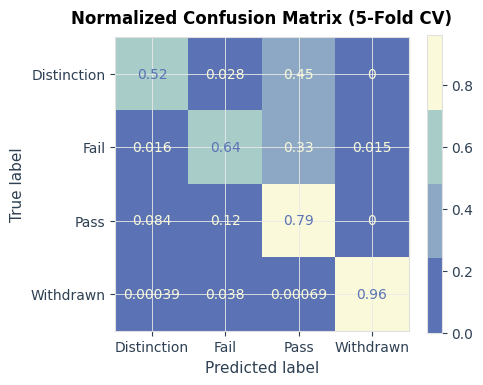

Cross-validated ROC-AUC (OVR): 0.9342


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score
from sklearn.preprocessing import label_binarize

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
clf = best_model

custom_cmap = ListedColormap([
    "#5B73B4",
    "#8CA8C5",
    "#A8CCC8",
    "#FAF9DA" 
])

y_pred = cross_val_predict(clf, X, y, cv=cv)
fig, ax = plt.subplots(figsize=(5, 4))
ConfusionMatrixDisplay.from_predictions(
    y, y_pred, normalize="true", cmap=custom_cmap, ax=ax
)
plt.title("Normalized Confusion Matrix (5-Fold CV)", fontsize=12, pad=10)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

if hasattr(clf, "predict_proba"):
    y_proba = cross_val_predict(clf, X, y, cv=cv, method="predict_proba")
    y_bin = label_binarize(y, classes=np.unique(y))
    auc = roc_auc_score(y_bin, y_proba, multi_class="ovr")
    print(f"Cross-validated ROC-AUC (OVR): {auc:.4f}")
else:
    print("Model has no predict_proba; ROC-AUC skipped.")

In [11]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report
import pandas as pd

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(best_model, X, y, cv=cv)
report = classification_report(y, y_pred, output_dict=True, zero_division=0)

per_class_df = pd.DataFrame(report).T.reset_index().rename(columns={'index': 'label'})
per_class_df = per_class_df[per_class_df['label'].isin(y.unique())]
display(per_class_df[['label','precision','recall','f1-score','support']])

,label,precision,recall,f1-score,support
0,Distinction,0.578890,0.524140,0.550156,3024.0
1,Fail,0.693138,0.637408,0.664106,7052.0
2,Pass,0.726182,0.792978,0.758111,12361.0
3,Withdrawn,0.988959,0.961304,0.974935,10156.0


### Error Analysis

The confusion matrix and per-class report show that:
- **Withdrawn** cases are detected with high recall (~0.96).
- **Pass** and **Fail** are often confused, indicating borderline performance overlap.
- **Distinction** tends to be misclassified as *Pass* due to similar engagement levels.

Improving temporal feature representation (e.g., early vs. late engagement) or cost-sensitive training could further improve minority-class recall.

## 9. Discussion & Conclusion

This project explored whether student engagement and assessment behavior could be used to predict final outcomes in the Open University Learning Analytics dataset.  
Using a series of classification models, the Random Forest with balanced class weights and tuned hyperparameters emerged as the most reliable performer.

Across 5-fold cross-validation, the model achieved a **weighted F1 of 0.78**, **accuracy of 0.78**, and a **multiclass ROC-AUC of 0.93**.  
The confusion matrix shows that the model is particularly strong at recognizing students who are likely to **withdraw** (recall ≈ 0.96), while still performing well for **Pass** (≈ 0.79) and **Fail** (≈ 0.64). The main source of confusion lies between *Pass* and *Distinction*, which is understandable given the narrow boundary between these categories.

Features capturing **VLE activity and assessment performance** contributed most to predictive accuracy, supporting the idea that active engagement and consistent participation are early indicators of success. Demographic features, by contrast, added little explanatory power.

There are still limitations. The dataset remains imbalanced—especially between *Withdrawn* and *Distinction*—and temporal changes in behavior were simplified into aggregate features rather than modeled over time. This makes it harder to capture early warning signs that unfold gradually.  

Overall, the tuned Random Forest provides a **practical, interpretable baseline** for predicting student outcomes. Future work could extend this analysis by incorporating temporal sequence data, experimenting with gradient boosting models such as LightGBM or XGBoost, and evaluating generalization across different courses or modules.  
Ultimately, this study reinforces the potential of learning analytics to support **early intervention and personalized student support** in online education.

### Reproducibility

- **Environment:** Python 3.11, scikit-learn ≥ 1.3  
- **Random seed:** 42 for all models and folds  
- **Hardware:** CPU runtime < 3 minutes; GPU not required  
- **Re-run:** simply select “Run all” in this Kaggle notebook to reproduce results.  
- **Colormap:** custom pastel palette applied consistently across all plots.


### Ethical & Practical Considerations

Predictions should be used to **support**, not penalize, students.  
Engagement metrics can reflect external factors such as internet access or workload, so false negatives and positives must be reviewed by instructors before action.  
Model outputs should be treated as **decision support**, complemented by human judgment and ongoing fairness monitoring.
